In [1]:
import matplotlib.pyplot as plt

def draw(G):
    nx.draw(G, with_labels=True, font_weight='bold')

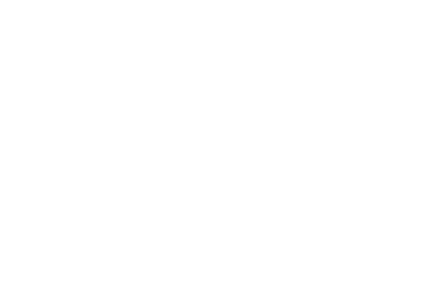

In [2]:
import networkx as nx
G = nx.Graph()
draw(G)

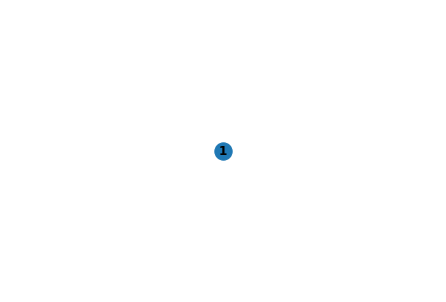

In [3]:
G.add_node(1)
draw(G)

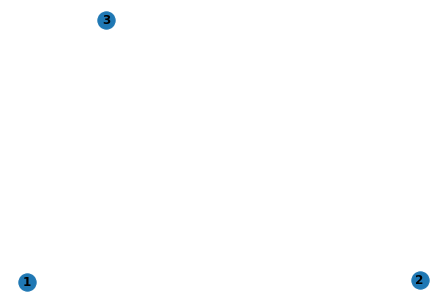

In [4]:
G.add_nodes_from([2, 3])
draw(G)

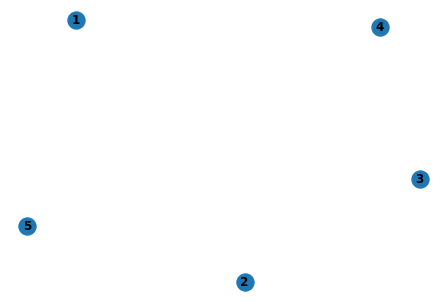

In [5]:
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])
draw(G)

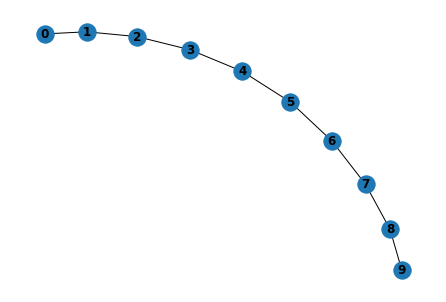

In [6]:
H = nx.path_graph(10)
draw(H)

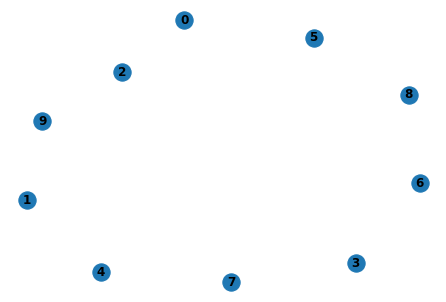

In [7]:
G.add_nodes_from(H)
draw(G)

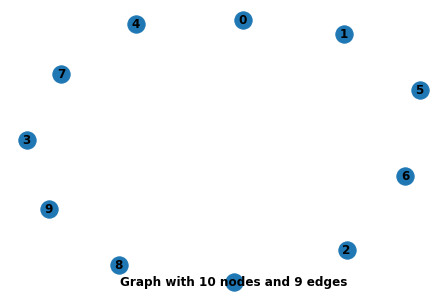

In [8]:
G.add_node(H)
draw(G)

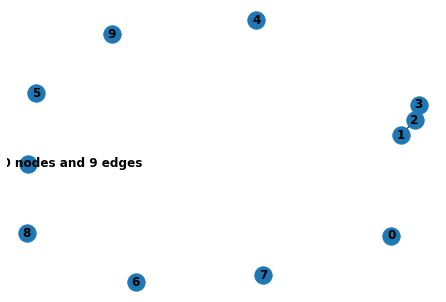

In [9]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*
draw(G)

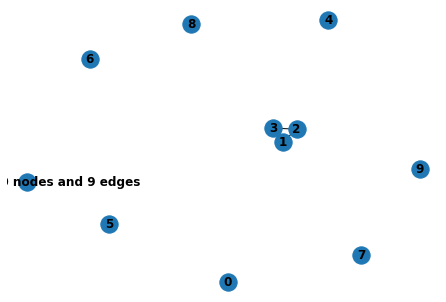

In [10]:
G.add_edges_from([(1, 2), (1, 3)])
draw(G)

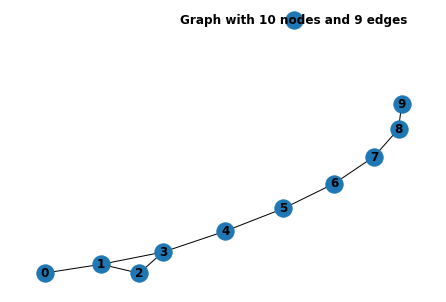

In [11]:
G.add_edges_from(H.edges)
draw(G)

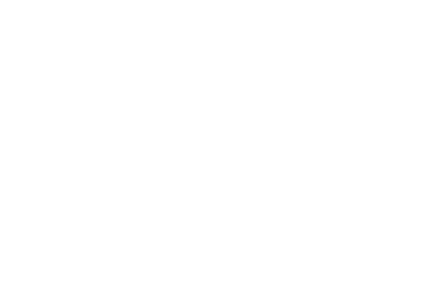

In [12]:
G.clear()
draw(G)

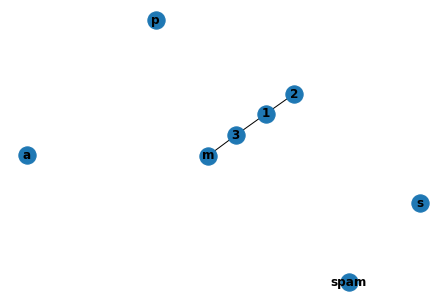

In [13]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')
draw(G)

[(1, {'time': '5pm', 'room': 714}), (2, {}), (3, {'time': '2pm'}), ('spam', {}), ('s', {}), ('p', {}), ('a', {}), ('m', {})]


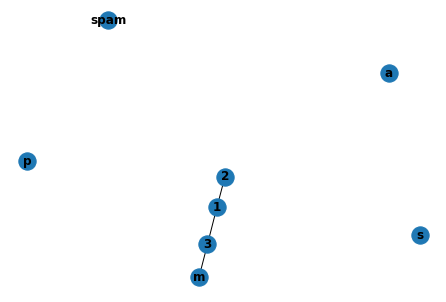

In [14]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

G.nodes[1]['room'] = 714
print(G.nodes.data())
draw(G)

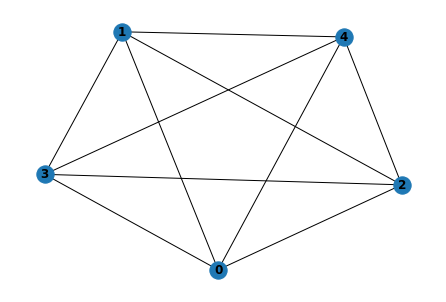

In [15]:
G = nx.complete_graph(5)
draw(G)


In [16]:
G = nx.Graph()
G.add_edge(1, 2, weight=1)
nx.is_weighted(G)

True

10


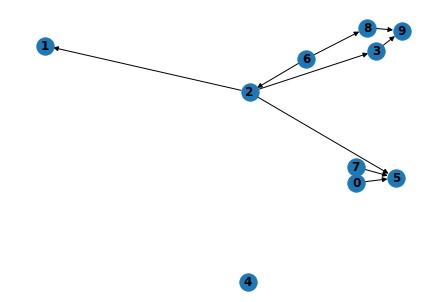

In [28]:
from itertools import combinations
import random

def n_simple_edges(G, n=1):
    print(G.number_of_nodes())
    a = set(list(combinations(range(G.number_of_nodes()), 2)))
    a -= set(G.edges())
    a = {edge if random.random() > 0.5 else (edge[1], edge[0]) for edge in a}
    a = random.sample(a, n)
    return a

def add_random_weights(edge_list):
    return [(a, b, random.random()) for a, b in edge_list]

G = nx.DiGraph()
G.add_nodes_from(range(10))
G.add_edges_from(n_simple_edges(G, n=10))
draw(G)


10


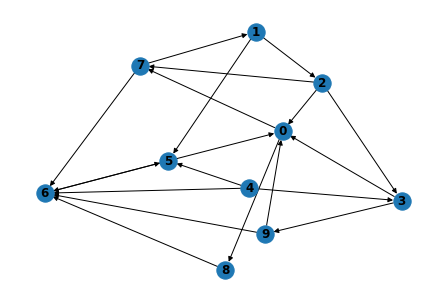

In [18]:
G.add_edges_from(n_simple_edges(G, n=10))
draw(G)

DiGraph with 9 nodes and 8 edges


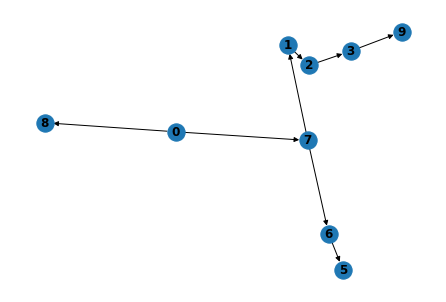

In [19]:
bfs_tree = nx.bfs_tree(G, 0)
draw(bfs_tree)
print(bfs_tree)

{0: [7, 8], 7: [6, 1], 6: [5], 1: [2], 2: [3], 3: [9]}


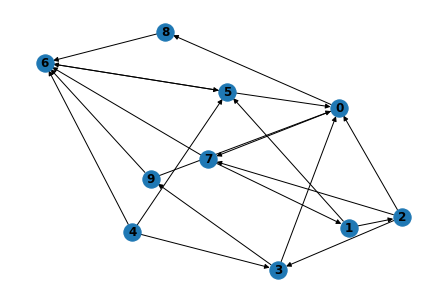

In [20]:
bfs_successors = nx.bfs_successors(G, 0)
print(dict(bfs_successors))
draw(G)


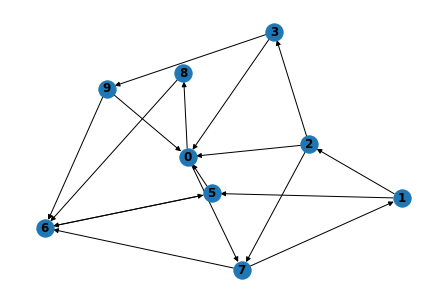

In [21]:
from collections import deque
def flow_bfs(G, source):
    fresh_edges = set(G.edges())
    node_queue = deque([source])
    while node_queue:
        node = node_queue.pop()
        for a in G.neighbors(node):
            curr_edge = (node, a)
            if curr_edge in fresh_edges:
                fresh_edges.remove(curr_edge)
                node_queue.append(a)
                yield curr_edge
        

flow_graph = nx.DiGraph(list(flow_bfs(G, 0)))
draw(flow_graph)

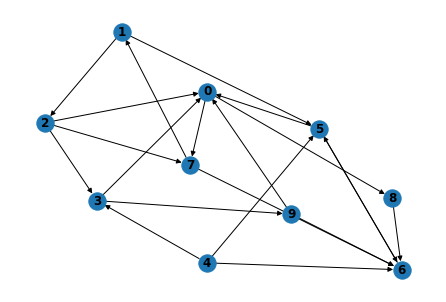

In [22]:
draw(G)

In [23]:
print(G.edges())

[(0, 7), (0, 8), (1, 2), (1, 5), (2, 0), (2, 7), (2, 3), (3, 0), (3, 9), (4, 5), (4, 6), (4, 3), (5, 6), (5, 0), (6, 5), (7, 6), (7, 1), (8, 6), (9, 6), (9, 0)]


In [34]:
G = nx.Graph()
G.add_edge(1, 2)
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

In [37]:
G = nx.DiGraph()
G.add_edge(1, 2)
G[1][2]['weight'] = 4.7

1


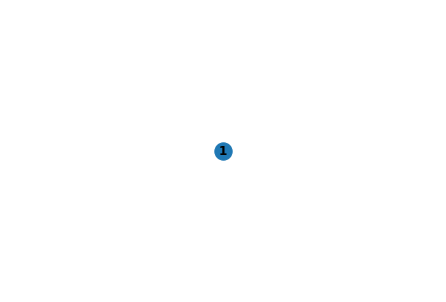

In [41]:
G = nx.DiGraph()
G.add_node(1)
G.add_node(1)
draw(G)
print(G.number_of_nodes())

In [47]:
from datetime import datetime
print(datetime.now())

2022-06-25 17:22:18.804918
